# The Scientific Libraries

## Numpy

### Exercise 1

In [5]:
import numpy as np

def p(x,coef):
    n = len(coef)
    X = np.empty(n)
    X[:] = x
    X[0] = 1
    y = np.cumprod(X)
    return coef @ y

In [6]:
p(2,[1,2,3])

17.0

### Exercise 2

In [77]:
from numpy.random import uniform

class discreteRV:
    
    def __init__(self,q):
        self.q = q
        self.Q = np.cumsum(self.q)

    def draw(self,k = 1):
        U = uniform(0, 1, size = k)
        return self.Q.searchsorted(U)

In [78]:
pascal = discreteRV([0.25,0.5,0.25])
uni = discreteRV([1/10 for n in range(10)])

print(pascal.draw())
print(pascal.draw(5))
print(uni.draw())
print(uni.draw(8))

[0]
[1 2 2 1 1]
[4]
[9 2 2 8 1 9 6 9]


## Matplotlib

### Exercise 1

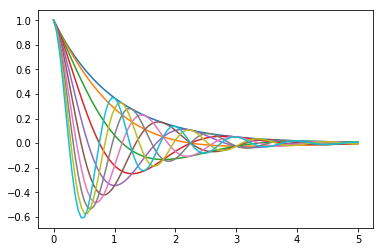

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(θ, x):
    return np.cos(np.pi*θ*x) * np.exp(-x)

θs = np.linspace(0, 2, 10)
x = np.linspace(0,5,100)
fig,ax = plt.subplots()

for θ in θs:
    ax.plot(x,f(θ,x))

plt.show()

## SciPy

### Exercise 1

In [1]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    if b - a > tol:    
        return 0.5 * (a + b)    
    else:
        lower, upper = a, b
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper
        return bisect(f,lower,upper,tol)

In [2]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f,0,1)

0.408294677734375

In [3]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

%timeit bisect(f,0,1)

55.3 µs ± 935 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Other Scientific Libraries

### Exercise 1

In [241]:
# pure Python:

from random import uniform

def MC_pure_python(state,p_hh,p_ll,n):
    seq = [state]
    for i in range(n):
        U = uniform(0,1)
        if state == 1:
            if U > p_hh:
                state = 0
        else:
            if U > p_ll:
                state = 1
        seq.append(state)
    return seq

In [242]:
n = 100000
x = MC_pure_python(1,0.8,0.9,n)
print(1-sum(x)/len(x))  # Fraction of time x is in state 0

0.6667933320666793


In [243]:
# pure Python, but using numpy:

import numpy as np
from numpy.random import uniform

def MC_pure_python_np(state,p_hh,p_ll,n):  
    U = uniform(0,1,n)
    seq = np.empty(n)
    seq[0] = state
    for i in range(1,n):
        if seq[i-1] == 1: 
            seq[i] = U[i-1] < p_hh
        else:
            seq[i] = U[i-1] > p_ll
    return seq

In [244]:
n = 100000
x = MC_pure_python_np(1,0.8,0.9,n)
print(np.mean(x == 0))  # Fraction of time x is in state 0

0.66735


In [245]:
# numba version:

from numba import jit

MC_numba = jit(MC_pure_python_np)

In [246]:
n = 100000
x = MC_numba(1,0.8,0.9,n)
print(np.mean(x == 0))  # Fraction of time x is in state 0

0.66276


In [229]:
# Cython version:

%load_ext Cython

In [234]:
%%cython
import numpy as np
from numpy.random import uniform
from numpy cimport int_t,float_t

def MC_cython(int state, float p_hh, float p_ll, int n):
    # == Create NumPy arrays first == #    
    U_np = uniform(0,1,n)
    seq_np = np.empty(n,dtype=int)
    # == Now create memoryviews of the arrays == #
    cdef int_t [:] U = U_np
    cdef float_t [:] seq = seq_np
    # == Main loop == #   
    seq[0] = state
    for i in range(1,n):
        if seq[i-1] == 1: 
            seq[i] = U[i-1] < p_hh
        else:
            seq[i] = U[i-1] > p_ll
    return np.asarray(seq)

# não consegui contornar esse erro, que aparece mesmo quando uso o código identico ao do site. Não vale a pena perder mais 
# tempo, dado que a implementação com o numba é mais rapida que a do cython

DistutilsPlatformError: Unable to find vcvarsall.bat

In [288]:
# comparando os resultados:

import quantecon as qe

p_hh = 0.8
p_ll = 0.9
state = 1
n = 100000

# pure python

qe.util.tic()
MC_pure_python(state,p_hh,p_ll,n)
t_py = qe.util.toc()

# pure python w/ numpy

qe.util.tic()
MC_pure_python_np(state,p_hh,p_ll,n)
t_np = qe.util.toc()

# numba

qe.util.tic()
MC_numba(state,p_hh,p_ll,n)
t_nu = qe.util.toc()

print(50*'-')
print('pure python w/ numpy' + ' ' + f'{round(100*t_np/t_py,4)} % of pure python')
print('numba' + ' ' + f'{round(100*t_nu/t_py,4)} % of pure python')

# se rodarmos esse código diversas vezes veremos que as vezes nb varia de 0% a 10% e np de 90% a 110%

TOC: Elapsed: 0:00:0.15
TOC: Elapsed: 0:00:0.15
TOC: Elapsed: 0:00:0.00
--------------------------------------------------
pure python w/ numpy 96.4625 % of pure python
numba 0.0 % of pure python
